In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV file (make sure it's in the same folder)
df = pd.read_csv("D:/Car_Price_Prediction/CarPrice_Assignment.csv")

# Show top rows
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Check for missing values
df.isnull().sum()

# Basic info
df.info()

# Check unique values
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fueltype'] = le.fit_transform(df['fueltype'])

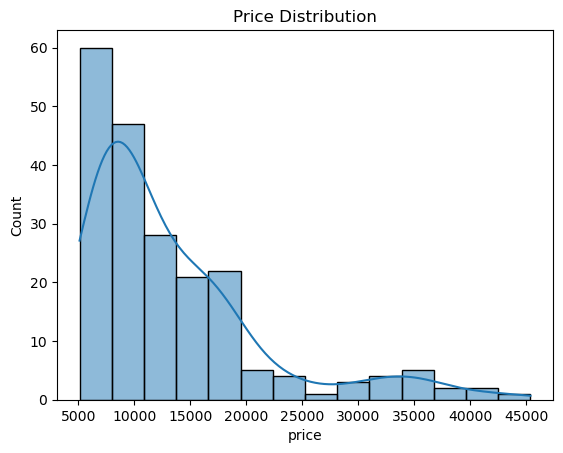

In [9]:
# Remove NaN and convert to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert strings to NaN
df = df.dropna(subset=['price'])  # Drop rows where price is NaN

# Now plot
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()



In [11]:
# First, drop unnecessary columns (like ID or Name)
df = df.drop(['car_ID', 'CarName'], axis=1)


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody',
                    'drivewheel', 'enginelocation', 'enginetype',
                    'cylindernumber', 'fuelsystem']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [15]:
# Features
X = df.drop('price', axis=1)

# Target
y = df['price']


In [17]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("✅ R2 Score:", round(r2_score(y_test, y_pred), 3))
print("📉 MSE:", round(mean_squared_error(y_test, y_pred), 2))
print("📏 MAE:", round(mean_absolute_error(y_test, y_pred), 2))


✅ R2 Score: 0.958
📉 MSE: 3326665.19
📏 MAE: 1291.5


In [27]:
new_car = [[3, 1, 1, 2, 2, 1, 88.6, 168.8, 64.1, 48.8, 2548,
            0, 4, 130, 3, 0.92, 3.47, 2.68, 9.0, 111, 5000, 21, 27]]

# Predict price
predicted_price = model.predict(new_car)
print("💰 Predicted Car Price: ₹", round(predicted_price[0], 2))


💰 Predicted Car Price: ₹ 8960.54


C:\Users\pawar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
